### 1. Importing the relevant libraries

In [1]:
# CODE HERE
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2. Loading the raw data

#### Load the data from a .csv in the same folder

In [2]:
# CODE HERE
data = pd.read_csv('linear.csv')

#### Let's explore the top 5 rows of the df


In [3]:
# CODE HERE
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


#### Let's explore the datatype of each column


In [4]:
data.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

## Preprocessing

### 3. Exploring the descriptive statistics of the variables
-  Descriptive statistics are very useful for initial exploration of the variables
- By default, only descriptives for the numerical variables are shown
- To include the categorical ones, you should specify this with an argument

#### `numerical variables`

In [5]:
# CODE HERE
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


#### `categorical variables`

In [6]:
# CODE HERE
data.describe(include='object')

,Brand,Body,Engine Type,Registration,Model
count,4345,4345,4345,4345,4345
unique,7,6,4,2,312
top,Volkswagen,sedan,Diesel,yes,E-Class
freq,936,1649,2019,3947,199


### Dealing with missing values

#### 4. Find the missing values from the data if any
- data.isnull() # shows a df with the information whether a data point is null. 
- Since True = the data point is missing, while False = the data point is not missing, we can sum them.
- This will give us the total number of missing values feature-wise.

#### `number of missing values in column`

In [7]:
# CODE HERE
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

#### `percentages of missing values in column`

In [8]:
# CODE HERE
(data.isnull().sum() / data.shape[0] ) * 100

Brand           0.000000
Price           3.958573
Body            0.000000
Mileage         0.000000
EngineV         3.452244
Engine Type     0.000000
Registration    0.000000
Year            0.000000
Model           0.000000
dtype: float64

#### 5. Let's simply drop all missing values
Note: This is not always recommended, however, when we remove less than 5% of the data, it is okay

In [9]:
data.dropna(axis = 0,how='any',inplace=True)  # delete row which contain null values

In [10]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

#### 6. Let's check the descriptives without the missing values


In [11]:
# CODE HERE
data.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


#### `Both the columns that have missing values are of numerical datatype`

### Exploring the PDFs for Numerical Variables in the DataFrame

#### 7. A great step in the data exploration is to display the probability distribution function (PDF) of a variable
- The PDF will show us how that variable is distributed 
- This makes it very easy to spot anomalies, such as outliers
- The PDF is often the basis on which we decide whether we want to transform a feature

### Price

<AxesSubplot:xlabel='Price', ylabel='Density'>

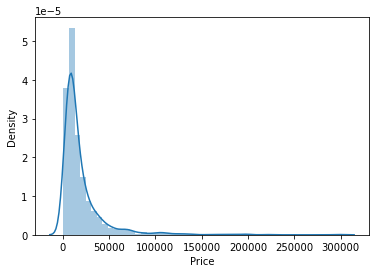

In [12]:
sns.distplot(data['Price'])

### Mileage

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

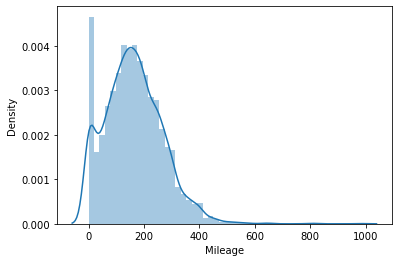

In [13]:
sns.distplot(data['Mileage'])

### EngineV

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

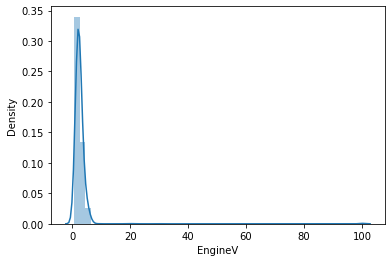

In [14]:
sns.distplot(data['EngineV'])

### Dealing with outliers
Hint: **Use IQR or Z Score**

### `I am using IQR technique below but will also try z technique at the end `




#### 8A. Identify the Outliers which are presented in `Price` Column

<AxesSubplot:xlabel='Price'>

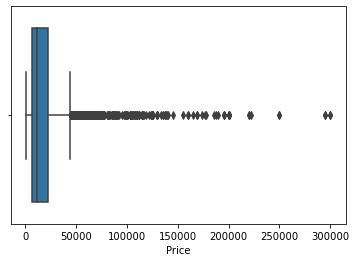

In [15]:
# CODE HERE
sns.boxplot(data['Price'])

In [16]:
q1=np.percentile(data['Price'],25)
q3=np.percentile(data['Price'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'Lower Bound:{lower_bound} and Upper Bound:{upper_bound}')

Lower Bound:-15352.5 and Upper Bound:44251.5


In [17]:
data[data['Price'] > upper_bound]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
37,BMW,67500.0,crossover,1,2.5,Diesel,yes,2016,X5
41,Mercedes-Benz,63000.0,crossover,86,5.5,Petrol,yes,2009,G 55 AMG
62,BMW,133000.0,crossover,7,4.4,Petrol,yes,2015,X5 M
64,Mercedes-Benz,50000.0,sedan,240,3.5,Petrol,yes,2006,S 350
...,...,...,...,...,...,...,...,...,...
4318,Mercedes-Benz,300000.0,other,37,5.0,Petrol,yes,2012,G 500
4322,Toyota,100000.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200
4327,Audi,80999.0,crossover,0,3.0,Diesel,yes,2016,Q7
4331,BMW,45000.0,crossover,80,3.0,Petrol,yes,2011,X6


#### 8B. Remove the Outliers which are presented in `Price` Column

In [18]:
# CODE HERE
data = data[data['Price'] <= upper_bound]   # remove outliers
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


#### 8C. Again Check the Distribution for `Price` Column and say something about distribution plot

<AxesSubplot:xlabel='Price', ylabel='Density'>

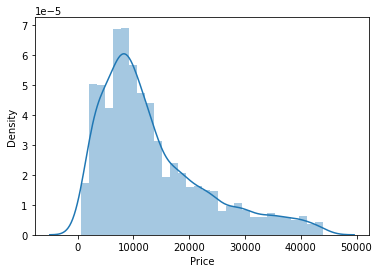

In [19]:
# CODE HERE
sns.distplot(data['Price'])

#### 9A. Same identify and remove the outliers in `Milage` column

<AxesSubplot:xlabel='Mileage'>

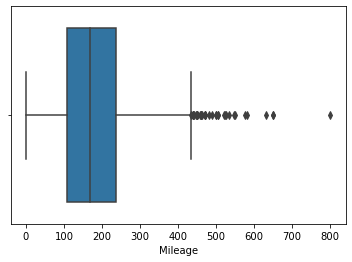

In [20]:
# CODE HERE
sns.boxplot(data['Mileage'])

In [21]:
q1=np.percentile(data['Mileage'],25)
q3=np.percentile(data['Mileage'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'Lower Bound:{lower_bound} and Upper Bound:{upper_bound}')

Lower Bound:-87.0 and Upper Bound:433.0


In [22]:
data[data['Mileage'] > upper_bound].head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
258,Volkswagen,2500.0,sedan,488,2.0,Petrol,yes,1991,Passat B3
284,Renault,4900.0,van,472,2.5,Diesel,yes,2000,Master
396,Mercedes-Benz,2650.0,sedan,470,2.0,Gas,yes,1985,190
899,Volkswagen,6500.0,other,547,1.9,Diesel,yes,1998,T4 (Transporter)


In [23]:
# CODE HERE
data = data[data['Mileage'] <= upper_bound]   # remove outliers
data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV
10,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,Megane
11,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,19


#### 9B. Check the distribution after deleting the outliers in `milage` column and say something about distribution.

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

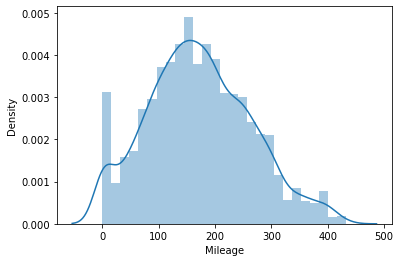

In [24]:
# CODE HERE
sns.distplot(data['Mileage'])

### `Now this variable is Normally Distributed`

#### 10A. Identify and remove the outliers from `EngineV` column



<AxesSubplot:xlabel='EngineV'>

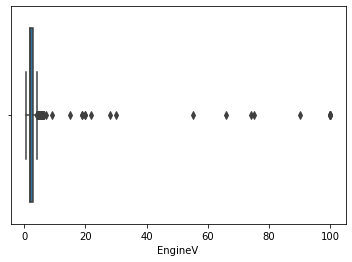

In [25]:
# CODE HERE
# CODE HERE
sns.boxplot(data['EngineV'])

In [26]:
# CODE HERE
q1=np.percentile(data['EngineV'],25)
q3=np.percentile(data['EngineV'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'Lower Bound:{lower_bound} and Upper Bound:{upper_bound}')

Lower Bound:0.3000000000000005 and Upper Bound:4.299999999999999


In [27]:
data[data['EngineV'] > upper_bound].head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
14,Toyota,16000.0,crossover,250,4.7,Gas,yes,2001,Land Cruiser 100
33,BMW,28500.0,crossover,160,4.8,Gas,yes,2008,X5
48,Mercedes-Benz,29500.0,sedan,134,5.0,Petrol,yes,2008,S 500
53,Mercedes-Benz,13500.0,sedan,317,5.0,Petrol,yes,2001,S 500


In [28]:
# CODE HERE
data = data[data['EngineV'] <= upper_bound]   # remove outliers
data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV
10,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,Megane
11,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,19
12,Audi,9500.0,vagon,165,2.70,Gas,yes,2003,A6 Allroad


#### 10B. Ckeck the distribution plot after deleting the outliers and say something about it.

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

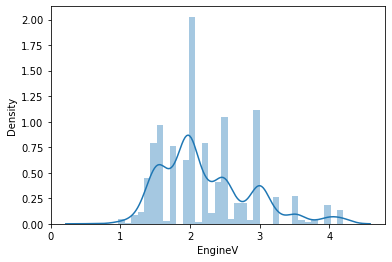

In [29]:
# CODE HERE
sns.distplot(data['EngineV'])

### `Now this variable is near to Normally distributed`

#### 10C. Perform Label & One-Hot Encoding For the Categorical Variable

### `Label Encoding`:

#### `Registration`

In [30]:
label_encoder = {"yes":1,"no":0}
data["Registration_encoded"] = data["Registration"].apply(lambda x: label_encoder[x] if x in label_encoder else 2)
data.sample(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Registration_encoded
771,BMW,17500.00,vagon,125,3.0,Diesel,yes,2006,530,1
3863,BMW,3900.00,sedan,380,3.0,Gas,yes,1989,530,1
3538,Toyota,16800.00,crossover,154,2.7,Petrol,yes,2005,Land Cruiser Prado,1
713,Renault,5500.00,van,160,1.5,Diesel,yes,2005,Kangoo,1
3522,Volkswagen,6300.00,vagon,132,2.8,Gas,yes,1995,Passat B4,1
3414,Mercedes-Benz,3150.00,vagon,220,1.7,Other,no,2001,A 170,0
839,Mercedes-Benz,16800.00,van,116,2.2,Diesel,yes,2013,Vito,1
3285,Renault,13321.33,crossover,0,1.5,Diesel,yes,2016,Sandero StepWay,1
3466,Toyota,18950.00,sedan,45,1.8,Petrol,yes,2014,Avensis,1
2916,Mitsubishi,6300.00,sedan,126,1.6,Petrol,yes,2006,Lancer,1


### `One hot Encoding`:

#### `Engine Type`

In [31]:
# Using get_dummies method in pandas
df_ohe = data.copy()
one_hot_1 = pd.get_dummies(df_ohe,prefix = 'Engine' ,columns=['Engine Type'],drop_first=False)
one_hot_1.insert(loc=2, column='Engine Type', value=data['Engine Type'].values)
one_hot_1

,Brand,Price,Engine Type,Body,Mileage,EngineV,Registration,Year,Model,Registration_encoded,Engine_Diesel,Engine_Gas,Engine_Other,Engine_Petrol
0,BMW,4200.0,Petrol,sedan,277,2.0,yes,1991,320,1,0,0,0,1
1,Mercedes-Benz,7900.0,Diesel,van,427,2.9,yes,1999,Sprinter 212,1,1,0,0,0
3,Audi,23000.0,Petrol,crossover,240,4.2,yes,2007,Q7,1,0,0,0,1
4,Toyota,18300.0,Petrol,crossover,120,2.0,yes,2011,Rav 4,1,0,0,0,1
7,Audi,14200.0,Diesel,vagon,200,2.7,yes,2006,A6,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,Diesel,van,163,2.5,yes,2008,T5 (Transporter),1,1,0,0,0
4339,Toyota,17900.0,Petrol,sedan,35,1.6,yes,2014,Corolla,1,0,0,0,1
4341,BMW,6500.0,Petrol,sedan,1,3.5,yes,1999,535,1,0,0,0,1
4342,BMW,8000.0,Petrol,sedan,194,2.0,yes,1985,520,1,0,0,0,1


#### `Body`

In [32]:
# Using get_dummies method in pandas
df_ohe = one_hot_1.copy()
one_hot_1 = pd.get_dummies(df_ohe,prefix = 'Body' ,columns=['Body'],drop_first=False)
one_hot_1.insert(loc=2, column='Body', value=data['Body'].values)
one_hot_1

,Brand,Price,Body,Engine Type,Mileage,EngineV,Registration,Year,Model,Registration_encoded,Engine_Diesel,Engine_Gas,Engine_Other,Engine_Petrol,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van
0,BMW,4200.0,sedan,Petrol,277,2.0,yes,1991,320,1,0,0,0,1,0,0,0,1,0,0
1,Mercedes-Benz,7900.0,van,Diesel,427,2.9,yes,1999,Sprinter 212,1,1,0,0,0,0,0,0,0,0,1
3,Audi,23000.0,crossover,Petrol,240,4.2,yes,2007,Q7,1,0,0,0,1,1,0,0,0,0,0
4,Toyota,18300.0,crossover,Petrol,120,2.0,yes,2011,Rav 4,1,0,0,0,1,1,0,0,0,0,0
7,Audi,14200.0,vagon,Diesel,200,2.7,yes,2006,A6,1,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,Diesel,163,2.5,yes,2008,T5 (Transporter),1,1,0,0,0,0,0,0,0,0,1
4339,Toyota,17900.0,sedan,Petrol,35,1.6,yes,2014,Corolla,1,0,0,0,1,0,0,0,1,0,0
4341,BMW,6500.0,sedan,Petrol,1,3.5,yes,1999,535,1,0,0,0,1,0,0,0,1,0,0
4342,BMW,8000.0,sedan,Petrol,194,2.0,yes,1985,520,1,0,0,0,1,0,0,0,1,0,0


In [33]:
# Using get_dummies method in pandas
df_ohe = one_hot_1.copy()
one_hot_1 = pd.get_dummies(df_ohe,prefix = 'Brand' ,columns=['Brand'],drop_first=False)
one_hot_1.insert(loc=2, column='Brand', value=data['Brand'].values)
one_hot_1

,Price,Body,Brand,Engine Type,Mileage,EngineV,Registration,Year,Model,Registration_encoded,...,Body_sedan,Body_vagon,Body_van,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen
0,4200.0,sedan,BMW,Petrol,277,2.0,yes,1991,320,1,...,1,0,0,0,1,0,0,0,0,0
1,7900.0,van,Mercedes-Benz,Diesel,427,2.9,yes,1999,Sprinter 212,1,...,0,0,1,0,0,1,0,0,0,0
3,23000.0,crossover,Audi,Petrol,240,4.2,yes,2007,Q7,1,...,0,0,0,1,0,0,0,0,0,0
4,18300.0,crossover,Toyota,Petrol,120,2.0,yes,2011,Rav 4,1,...,0,0,0,0,0,0,0,0,1,0
7,14200.0,vagon,Audi,Diesel,200,2.7,yes,2006,A6,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,11500.0,van,Volkswagen,Diesel,163,2.5,yes,2008,T5 (Transporter),1,...,0,0,1,0,0,0,0,0,0,1
4339,17900.0,sedan,Toyota,Petrol,35,1.6,yes,2014,Corolla,1,...,1,0,0,0,0,0,0,0,1,0
4341,6500.0,sedan,BMW,Petrol,1,3.5,yes,1999,535,1,...,1,0,0,0,1,0,0,0,0,0
4342,8000.0,sedan,BMW,Petrol,194,2.0,yes,1985,520,1,...,1,0,0,0,1,0,0,0,0,0


#### `dropping column because it has 247 types of values`

In [34]:
one_hot_1.dtypes

Price                   float64
Body                     object
Brand                    object
Engine Type              object
Mileage                   int64
EngineV                 float64
Registration             object
Year                      int64
Model                    object
Registration_encoded      int64
Engine_Diesel             uint8
Engine_Gas                uint8
Engine_Other              uint8
Engine_Petrol             uint8
Body_crossover            uint8
Body_hatch                uint8
Body_other                uint8
Body_sedan                uint8
Body_vagon                uint8
Body_van                  uint8
Brand_Audi                uint8
Brand_BMW                 uint8
Brand_Mercedes-Benz       uint8
Brand_Mitsubishi          uint8
Brand_Renault             uint8
Brand_Toyota              uint8
Brand_Volkswagen          uint8
dtype: object

### Multicollinearity

#### 11A. Say about Multicollinearity and Find the Multicollinearity variables in the Dataset. 


### `Multicollinearity`:
- Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

- This means that an independent variable can be predicted from another independent variable in a regression model. For example, height and weight, household income and water consumption, mileage and price of a car, study time and leisure time, etc.

<AxesSubplot:>

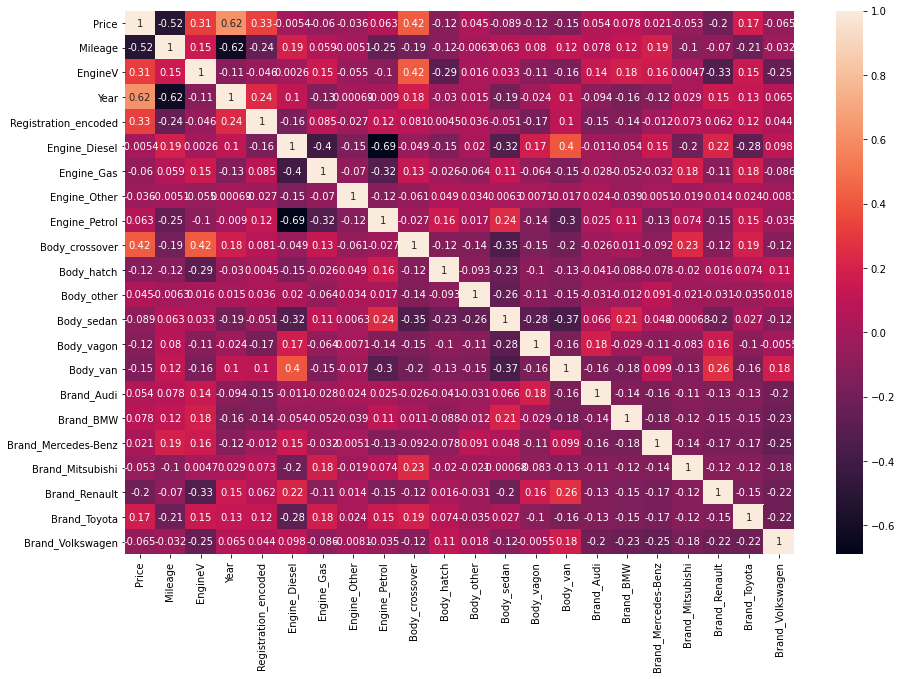

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(one_hot_1.corr(),annot=True)

### Numerical columns:
`Milage and year are multicollinear variables`
### Categorical columns:
`Rightnow I am not able to judge this just by seeing correlation matrix, we have to dip more, which I have done below`

#### 11B. Show the variables which are having Multicollinearity.
<br />
<br />
<br />


## `Categorical Variables ( chi square ) ------------------------------`

### Brand vs Body

In [36]:
two_way_frquency=pd.crosstab(data['Brand'],data['Body'])
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

2.3108125817537855e-269

#### `Brand and Body are related`

### Brand vs EngineType

In [37]:
two_way_frquency=pd.crosstab(data['Brand'],data['Engine Type'])

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

4.428006391028606e-137

#### `Brand and Engine type are related`

### Brand vs Registration

In [38]:
two_way_frquency=pd.crosstab(data['Brand'],data['Registration'])
x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

9.547047723979418e-42

#### `Brand and Registration are related`

### Body vs Engine Type

In [39]:
two_way_frquency=pd.crosstab(data['Body'],data['Engine Type'])
x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

4.65930865491815e-192

#### `bodyand Engine Type are related`

### Body vs Registration

In [40]:
two_way_frquency=pd.crosstab(data['Body'],data['Registration'])
x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

6.179157169957441e-30

#### `Body and Registration are related`

### Engine Type vs Registration

In [41]:
two_way_frquency=pd.crosstab(data['Engine Type'],data['Registration'])
x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

3.366306488717531e-22

#### `Engine Type and registration are related`

### Brand vs Model

In [42]:
two_way_frquency=pd.crosstab(data['Brand'],data['Model'])
x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

0.0

#### `Brand and Model are related`

### `There is a lot of multicollinearity between columns as you can see below`

In [43]:
one_hot_1.columns

Index(['Price', 'Body', 'Brand', 'Engine Type', 'Mileage', 'EngineV',
       'Registration', 'Year', 'Model', 'Registration_encoded',
       'Engine_Diesel', 'Engine_Gas', 'Engine_Other', 'Engine_Petrol',
       'Body_crossover', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen'],
      dtype='object')

In [44]:
X_cat = one_hot_1[['Registration_encoded',
       'Engine_Diesel', 'Engine_Gas', 'Engine_Other', 'Engine_Petrol',
       'Body_crossover', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van','Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen']]

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   # vif
vif = pd.DataFrame()
vif['Features'] = X_cat.columns
vif['VIF'] = [variance_inflation_factor(X_cat.values, i) for i in range(X_cat.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Body_vagon,inf
1,Engine_Diesel,inf
16,Brand_Toyota,inf
15,Brand_Renault,inf
14,Brand_Mitsubishi,inf
13,Brand_Mercedes-Benz,inf
12,Brand_BMW,inf
11,Brand_Audi,inf
10,Body_van,inf
17,Brand_Volkswagen,inf


In [46]:
y = one_hot_1['Price']

In [47]:
import statsmodels.api as sm
X_train_sm  = sm.add_constant(X_cat)
ols_model = sm.OLS(y,X_train_sm)
ols_model = ols_model.fit()
ols_model.pvalues

const                    9.643376e-08
Registration_encoded    1.791681e-127
Engine_Diesel            1.467856e-20
Engine_Gas               9.861745e-13
Engine_Other             1.945327e-01
Engine_Petrol            1.060981e-02
Body_crossover          4.036243e-158
Body_hatch               3.447933e-12
Body_other               2.746160e-02
Body_sedan               9.433631e-04
Body_vagon               1.676566e-05
Body_van                 9.736918e-22
Brand_Audi               2.612344e-18
Brand_BMW                5.806708e-16
Brand_Mercedes-Benz      7.632862e-05
Brand_Mitsubishi         1.961574e-22
Brand_Renault            1.287610e-26
Brand_Toyota             2.651165e-13
Brand_Volkswagen         6.209986e-01
dtype: float64

### `so I haveto investigate it I have to dip more, and treat it`

### I should remove the redundant columns to remove multi collinerity

In [48]:
X_cat = one_hot_1[['Registration_encoded',
       'Engine_Diesel', 'Engine_Gas', 'Engine_Other',
       'Body_crossover', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon','Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota']]

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   # vif
vif = pd.DataFrame()
vif['Features'] = X_cat.columns
vif['VIF'] = [variance_inflation_factor(X_cat.values, i) for i in range(X_cat.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Registration_encoded,5.36
7,Body_sedan,3.31
1,Engine_Diesel,2.29
4,Body_crossover,2.16
14,Brand_Toyota,1.73
10,Brand_BMW,1.68
11,Brand_Mercedes-Benz,1.68
12,Brand_Mitsubishi,1.54
13,Brand_Renault,1.53
8,Body_vagon,1.52


In [50]:
import statsmodels.api as sm
X_train_sm  = sm.add_constant(X_cat)
ols_model = sm.OLS(y,X_train_sm)
ols_model = ols_model.fit()
ols_model.pvalues

const                    9.131519e-02
Registration_encoded    1.791681e-127
Engine_Diesel            2.471553e-07
Engine_Gas               6.126454e-15
Engine_Other             8.897734e-01
Body_crossover          9.032874e-125
Body_hatch               5.520570e-01
Body_other               2.594500e-14
Body_sedan               1.764077e-08
Body_vagon               1.017483e-03
Brand_Audi               9.065490e-12
Brand_BMW                5.246984e-10
Brand_Mercedes-Benz      9.531905e-04
Brand_Mitsubishi         4.037912e-13
Brand_Renault            2.138302e-17
Brand_Toyota             9.229768e-09
dtype: float64

### `Now these columns are not effected with multicollinearity --------------- Bam!!`
<br />
<br />
<br />


## `Numerical variables ---------------------------------`

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # to check multicollinearity


### function of vif
def cal_vif(X):
    vif=pd.DataFrame()
    vif['var']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

In [52]:
X_num = one_hot_1[[ 'Mileage', 'EngineV','Year']]

In [53]:
cal_vif(X_num)

,var,VIF
0,Mileage,4.543781
1,EngineV,12.955885
2,Year,14.386646


<AxesSubplot:>

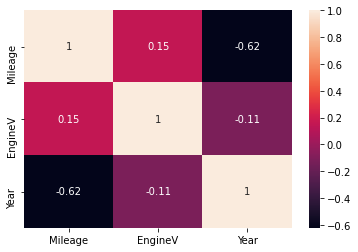

In [54]:
sns.heatmap(X_num.corr(),annot=True)

#### Numerical columns:
`Milage and year are multicollinear variables`

### Model fit

#### 12A. Perform The Model fit & Model output using OLS 

In [55]:
X = one_hot_1[[ 'Mileage', 'EngineV',
       'Year', 'Registration_encoded',
       'Engine_Diesel', 'Engine_Gas', 'Engine_Other', 'Engine_Petrol',
       'Body_crossover', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van','Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen']]
y = one_hot_1['Price']

In [56]:
import statsmodels.api as sm
X_train_sm  = sm.add_constant(X)
ols_model = sm.OLS(y,X_train_sm)
ols_model = ols_model.fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     474.1
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:36:22   Log-Likelihood:                -33901.
No. Observations:                3419   AIC:                         6.784e+04
Df Residuals:                    3400   BIC:                         6.796e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.704e+05   2.29e+04    -37.944      0.000   -9.15e+05   -8.25e+05
Mileage                -22.3892      1.293    -17.320      0.000     -24.924     -19.855
EngineV               2672.6418    173.141     15.436      0.000    2333.170    3012.113
Year                   678.8480     17.781     38.179      0.000     643.986     713.710
Registration_encoded  6842.1584    300.541     22.766      0.000    6252.898    7431.419
Engine_Diesel        -2.166e+05   5767.240    -37.551      0.000   -2.28e+05   -2.05e+05
Engine_Gas           -2.184e+05   5716.094    -38.206      0.000    -2.3e+05   -2.07e+05
Engine_Other         -2.177e+05   5758.229    -37.803      0.000   -2.29e+05   -2.06e+05
Engine_Petrol        -2.178e+05   5721.868    -38.060      0.000   -2.29e+05   -2.07e+05
Body_crossover       -1.403e+05   3854.708    -36.405      0.000   -1.48e+05   -1.33e+05
Body_hatch           -1.463e+05   3795.700    -38.543      0.000   -1.54e+05   -1.39e+05
Body_other           -1.448e+05   3834.102    -37.757      0.000   -1.52e+05   -1.37e+05
Body_sedan           -1.455e+05   3817.746    -38.101      0.000   -1.53e+05   -1.38e+05
Body_vagon           -1.459e+05   3832.233    -38.074      0.000   -1.53e+05   -1.38e+05
Body_van             -1.477e+05   3849.018    -38.361      0.000   -1.55e+05    -1.4e+05
Brand_Audi            -1.21e+05   3281.367    -36.887      0.000   -1.27e+05   -1.15e+05
Brand_BMW            -1.204e+05   3271.510    -36.808      0.000   -1.27e+05   -1.14e+05
Brand_Mercedes-Benz   -1.22e+05   3277.555    -37.230      0.000   -1.28e+05   -1.16e+05
Brand_Mitsubishi     -1.286e+05   3284.866    -39.145      0.000   -1.35e+05   -1.22e+05
Brand_Renault         -1.29e+05   3294.565    -39.165      0.000   -1.35e+05   -1.23e+05
Brand_Toyota         -1.246e+05   3302.560    -37.734      0.000   -1.31e+05   -1.18e+05
Brand_Volkswagen     -1.247e+05   3284.926    -37.959      0.000   -1.31e+05   -1.18e+05
==============================================================================
Omnibus:                      770.575   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2522.700
Skew:                           1.123   Prob(JB):                         0.00
Kurtosis:                       6.558   Cond. No.                     2.97e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### `It is a Bad Model ---------- as it have a lot of multicollinearity and we have to treat it`
<br />
<br />
<br />


#### 12B. Explain the Model Evaluation metrics in OLS method.

**Note:** Give The Explanation about R-square, Adjusted.R-Square and Explain the P-Value in OLS Table

### `R Square`: 
- `R-squared (R2)`: Is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, `if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs`.
<br />

- `Here R-squared: 0.715 which means SSR/SST = 0.715 which means it is not a good fit for this model because R-square is very low`.
<br />

### ` Adjusted.R-Square`
- ` Adjusted.R-Square`: The Adjusted R-squared takes into account the number of independent variables used for predicting the target variable. In doing so, we can determine whether adding new variables to the model actually increases the model fit.
<br />

- `Here Adjusted.R-squared: 00.714`.
- Near to Same R Square and adjusted.R-Square means that the variables taken taken to fit line are actually not casusing any unnecessary damage as The adjusted R2 will penalize you for adding independent variables that do not fit the model.

<br />

###  `P-value`
- `P-value`: Same as in Hypothesis testing P-value less then 0.05 means we can reject our null hypothesis, or in other words these variables are not related and can be used to predict dependent variable

#### 13A. Feature Selection using with Forward Selection
<br />
<br />
<br />


## `Feature Selection ( Forward Selection )`

In [57]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X[['Mileage']])
lr = sm.OLS(y, X_train_sm).fit()
print('R-squared',lr.rsquared)
print('Adj-Rsquared',lr.rsquared_adj)
print('-----------------------------')
print('-----------------------------')
print(f'parameters:\n{lr.params}')
print('-----------------------------')
print('-----------------------------')
print(f'p-values:\n{lr.pvalues}')

R-squared 0.2663678751333278
Adj-Rsquared 0.2661531744822109
-----------------------------
-----------------------------
parameters:
const      21695.580406
Mileage      -51.334413
dtype: float64
-----------------------------
-----------------------------
p-values:
const       0.000000e+00
Mileage    3.906071e-232
dtype: float64


In [58]:
X_train_sm = sm.add_constant(X[['Mileage','EngineV']])
lr = sm.OLS(y, X_train_sm).fit()
print('R-squared',lr.rsquared)
print('Adj-Rsquared',lr.rsquared_adj)
print('-----------------------------')
print('-----------------------------')
print(f'parameters:\n{lr.params}')
print('-----------------------------')
print('-----------------------------')
print(f'p-values:\n{lr.pvalues}')

R-squared 0.42389302396998674
Adj-Rsquared 0.42355572480369275
-----------------------------
-----------------------------
parameters:
const      10155.043514
Mileage      -57.414863
EngineV     5659.834830
dtype: float64
-----------------------------
-----------------------------
p-values:
const      1.338114e-103
Mileage     0.000000e+00
EngineV    1.482852e-181
dtype: float64


In [59]:
X_train_sm = sm.add_constant(X[['Mileage','EngineV','Year']])
lr = sm.OLS(y, X_train_sm).fit()
print('R-squared',lr.rsquared)
print('Adj-Rsquared',lr.rsquared_adj)
print('-----------------------------')
print('-----------------------------')
print(f'parameters:\n{lr.params}')
print('-----------------------------')
print('-----------------------------')
print(f'p-values:\n{lr.pvalues}')

R-squared 0.5754987980876582
Adj-Rsquared 0.5751258834154074
-----------------------------
-----------------------------
parameters:
const     -1.394272e+06
Mileage   -2.679401e+01
EngineV    5.767502e+03
Year       6.974522e+02
dtype: float64
-----------------------------
-----------------------------
p-values:
const      6.406187e-226
Mileage     3.134784e-75
EngineV    6.098716e-244
Year       9.309216e-229
dtype: float64


In [60]:
X_train_sm = sm.add_constant(X[['Mileage','EngineV','Year','Body_crossover', 'Body_hatch', 'Body_other', 'Body_sedan',]])
lr = sm.OLS(y, X_train_sm).fit()
print('R-squared',lr.rsquared)
print('Adj-Rsquared',lr.rsquared_adj)
print('-----------------------------')
print('-----------------------------')
print(f'parameters:\n{lr.params}')
print('-----------------------------')
print('-----------------------------')
print(f'p-values:\n{lr.pvalues}')

R-squared 0.6028325705362743
Adj-Rsquared 0.6020175098484273
-----------------------------
-----------------------------
parameters:
const            -1.413608e+06
Mileage          -2.116637e+01
EngineV           4.402598e+03
Year              7.070999e+02
Body_crossover    5.485581e+03
Body_hatch        9.114345e+02
Body_other        2.950067e+03
Body_sedan        2.166075e+03
dtype: float64
-----------------------------
-----------------------------
p-values:
const             1.593046e-227
Mileage            1.233636e-46
EngineV           8.013325e-118
Year              7.619855e-231
Body_crossover     4.351371e-49
Body_hatch         3.139152e-02
Body_other         7.485702e-15
Body_sedan         5.348919e-17
dtype: float64


In [61]:
X_train_sm = sm.add_constant(X[['Mileage','EngineV','Year','Body_crossover', 'Body_hatch',
                                'Body_other', 'Body_sedan','Body_vagon','Engine_Diesel', 'Engine_Gas', 'Engine_Other']])
lr = sm.OLS(y, X_train_sm).fit()
print('R-squared',lr.rsquared)
print('Adj-Rsquared',lr.rsquared_adj)
print('-----------------------------')
print('-----------------------------')
print(f'parameters:\n{lr.params}')
print('-----------------------------')
print('-----------------------------')
print(f'p-values:\n{lr.pvalues}')

R-squared 0.6084388500533512
Adj-Rsquared 0.6071746373590708
-----------------------------
-----------------------------
parameters:
const            -1.394898e+06
Mileage          -2.125264e+01
EngineV           4.440002e+03
Year              6.974442e+02
Body_crossover    6.374947e+03
Body_hatch        1.690090e+03
Body_other        3.554754e+03
Body_sedan        3.006645e+03
Body_vagon        1.182157e+03
Engine_Diesel     3.088047e+02
Engine_Gas       -1.601185e+03
Engine_Other     -7.917937e+02
dtype: float64
-----------------------------
-----------------------------
p-values:
const             3.934872e-215
Mileage            2.079813e-44
EngineV           5.536118e-120
Year              5.597071e-218
Body_crossover     1.343978e-52
Body_hatch         3.148240e-04
Body_other         1.578627e-17
Body_sedan         9.915578e-20
Body_vagon         2.168740e-03
Engine_Diesel      2.354869e-01
Engine_Gas         2.337464e-07
Engine_Other       2.106573e-01
dtype: float64


In [62]:
X_train_sm = sm.add_constant(X[['Mileage','EngineV','Year','Body_crossover', 'Body_hatch',
                                'Body_other', 'Body_sedan','Body_vagon','Engine_Diesel',
                                'Engine_Gas', 'Engine_Other','Registration_encoded']])
lr = sm.OLS(y, X_train_sm).fit()
print('R-squared',lr.rsquared)
print('Adj-Rsquared',lr.rsquared_adj)
print('-----------------------------')
print('-----------------------------')
print(f'parameters:\n{lr.params}')
print('-----------------------------')
print('-----------------------------')
print(f'p-values:\n{lr.pvalues}')

R-squared 0.641631342591315
Adj-Rsquared 0.6403687401576966
-----------------------------
-----------------------------
parameters:
const                  -1.308453e+06
Mileage                -1.926034e+01
EngineV                 4.513847e+03
Year                    6.509190e+02
Body_crossover          7.010485e+03
Body_hatch              2.656654e+03
Body_other              4.047991e+03
Body_sedan              3.925145e+03
Body_vagon              2.543941e+03
Engine_Diesel           1.087202e+03
Engine_Gas             -1.846043e+03
Engine_Other           -1.827100e+02
Registration_encoded    5.916692e+03
dtype: float64
-----------------------------
-----------------------------
p-values:
const                   3.274968e-205
Mileage                  6.674901e-40
EngineV                 7.618944e-134
Year                    1.155150e-205
Body_crossover           1.160979e-67
Body_hatch               4.452315e-09
Body_other               5.815175e-24
Body_sedan               4.032670e-3

In [63]:
X_train_sm = sm.add_constant(X[['Mileage','EngineV','Year','Body_crossover', 'Body_hatch',
                                'Body_other', 'Body_sedan','Body_vagon','Engine_Diesel',
                                'Engine_Gas', 'Engine_Other','Registration_encoded','Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota']])
lr = sm.OLS(y, X_train_sm).fit()
print('R-squared',lr.rsquared)
print('Adj-Rsquared',lr.rsquared_adj)
print('-----------------------------')
print('-----------------------------')
print(f'parameters:\n{lr.params}')
print('-----------------------------')
print('-----------------------------')
print(f'p-values:\n{lr.pvalues}')

R-squared 0.7150964787037819
Adj-Rsquared 0.7135881659439784
-----------------------------
-----------------------------
parameters:
const                  -1.360530e+06
Mileage                -2.238925e+01
EngineV                 2.672642e+03
Year                    6.788480e+02
Body_crossover          7.319819e+03
Body_hatch              1.352587e+03
Body_other              2.888772e+03
Body_sedan              2.192368e+03
Body_vagon              1.742392e+03
Engine_Diesel           1.207549e+03
Engine_Gas             -6.141743e+02
Engine_Other            9.446606e+01
Registration_encoded    6.842158e+03
Brand_Audi              3.653001e+03
Brand_BMW               4.274288e+03
Brand_Mercedes-Benz     2.670151e+03
Brand_Mitsubishi       -3.892287e+03
Brand_Renault          -4.339385e+03
Brand_Toyota            7.563019e+01
dtype: float64
-----------------------------
-----------------------------
p-values:
const                   6.377258e-264
Mileage                  1.811411e-64
Eng

In [64]:
X = one_hot_1[['Body_crossover', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon','Engine_Diesel', 'Engine_Gas', 'Engine_Other','Registration_encoded','Mileage','EngineV','Year','Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota']]
y = one_hot_1['Price']

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   # vif
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Year,46.04
10,EngineV,22.76
8,Registration_encoded,11.32
9,Mileage,5.77
3,Body_sedan,4.87
5,Engine_Diesel,3.48
0,Body_crossover,2.97
13,Brand_BMW,1.92
14,Brand_Mercedes-Benz,1.90
17,Brand_Toyota,1.88


In [66]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X)
ols_model = sm.OLS(y,X_train_sm)
ols_model = ols_model.fit()
ols_model.pvalues

const                   6.377258e-264
Body_crossover           8.098077e-84
Body_hatch               9.487883e-04
Body_other               1.374024e-15
Body_sedan               2.137769e-13
Body_vagon               5.172433e-07
Engine_Diesel            2.557287e-07
Engine_Gas               2.244000e-02
Engine_Other             8.616988e-01
Registration_encoded    6.660657e-107
Mileage                  1.811411e-64
EngineV                  5.221393e-52
Year                    9.787259e-266
Brand_Audi               9.287089e-28
Brand_BMW                1.039392e-40
Brand_Mercedes-Benz      1.049091e-20
Brand_Mitsubishi         1.602463e-27
Brand_Renault            1.021333e-45
Brand_Toyota             8.139120e-01
dtype: float64

### `Interpretations`
- Looking at the p-values of variables, it is clear that it is not good to drop any column.
- VIF of some column is high, but p-value is too low, so no need to drop any column.

<br />
<br />
<br />
<br />

-----

#### 13B. Feature Selection using with Backward Selection
<br />
<br />
<br />


## `Feature Selection ( Backward Elimination )`

In [68]:
X = one_hot_1[['Body_crossover', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon','Engine_Diesel', 'Engine_Gas', 'Engine_Other','Registration_encoded','Mileage','EngineV','Year','Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota']]
y = one_hot_1['Price']

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   # vif
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Year,46.04
10,EngineV,22.76
8,Registration_encoded,11.32
9,Mileage,5.77
3,Body_sedan,4.87
5,Engine_Diesel,3.48
0,Body_crossover,2.97
13,Brand_BMW,1.92
14,Brand_Mercedes-Benz,1.90
17,Brand_Toyota,1.88


In [70]:
X_train_sm  = sm.add_constant(X)
ols_model = sm.OLS(y,X_train_sm)
ols_model = ols_model.fit()
ols_model.pvalues

const                   6.377258e-264
Body_crossover           8.098077e-84
Body_hatch               9.487883e-04
Body_other               1.374024e-15
Body_sedan               2.137769e-13
Body_vagon               5.172433e-07
Engine_Diesel            2.557287e-07
Engine_Gas               2.244000e-02
Engine_Other             8.616988e-01
Registration_encoded    6.660657e-107
Mileage                  1.811411e-64
EngineV                  5.221393e-52
Year                    9.787259e-266
Brand_Audi               9.287089e-28
Brand_BMW                1.039392e-40
Brand_Mercedes-Benz      1.049091e-20
Brand_Mitsubishi         1.602463e-27
Brand_Renault            1.021333e-45
Brand_Toyota             8.139120e-01
dtype: float64

### `Interpretations`
- Looking at the p-values of variables, it is clear that it is not good to drop any column.
- VIF of some column is high, but p-value is too low, so no need to drop any column.

<br />
<br />
<br />
<br />

-----

#### 14. Explain about Assumption of errors and predictors


#### 15A. Split The Dataset into Train and Test (80:20) using Sklearn

In [72]:
###CODEHERE
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

#### 15B. Perform the Linear Regression Model fit using Sklearn.

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred))
Rsqr_test = round(r2_score(y_test,y_pred)*100,2)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

RMSE is:  4736.488539197432
RSquared is: 71.54%


#### 15C. Explain about Lasso Regression and Perform the Lasso Regression

In [74]:
from sklearn.linear_model import Lasso

lasso_r = Lasso(alpha=1)
lasso_r.fit(X_train,y_train)
y_pred = lasso_r.predict(X_test)

rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred))
Rsqr_test = round(r2_score(y_test,y_pred)*100,2)

print('Evaluation metrics for Testing Dataset')
print('-'*40)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4736.482251521142
RSquared is: 71.54%


#### 15D. Explain about Ridge Regression and Perform the Ridge Regression

In [75]:
from sklearn.linear_model import Ridge
lm_r = Ridge(alpha=3)
lm_r.fit(X_train,y_train)
y_pred = lm_r.predict(X_test)
rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred))
Rsqr_test = round(r2_score(y_test,y_pred)*100,2)

print('Evaluation metrics for Testing Dataset')
print('-'*40)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4736.234392323134
RSquared is: 71.55%


#### 16. Perform Residual Analysis Give The Interpretations.

<AxesSubplot:xlabel='Price', ylabel='Density'>

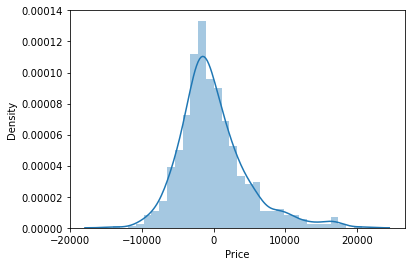

In [79]:
residual = y_test - y_pred
sns.distplot(residual)

### `It is normally distributed`

### Give the Conclusions about the Model fits for What you Observe.

In [77]:
### Interpretations

## `END ----------------------------------------`

In [78]:
hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh

NameError: name 'hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh' is not defined

In [ ]:
df = pd.read_csv('linear.csv')

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df = df.dropna()

In [ ]:
num = df[['Price','EngineV','Mileage','Year']]

In [ ]:
cat = df[['Brand', 'Body', 'Engine Type',
       'Registration']]

In [ ]:
cat = pd.get_dummies(cat)

In [ ]:
cat

In [ ]:
num

In [ ]:
new = pd.concat([num,cat],axis=1)

In [ ]:
new

In [ ]:
new.columns

In [ ]:
X = new[[ 'EngineV', 'Mileage', 'Year', 'Brand_Audi', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_crossover', 'Body_hatch',
       'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Diesel', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_no', 'Registration_yes']]
y = new['Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model  = LinearRegression()

model.fit(X_train,y_train)

In [ ]:
y_pred  = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
ac = r2_score(y_test,y_pred)

In [ ]:
print(ac)

## `End ---------------------------------------------------------`